## Part 1: Flight Tickets API Exploration
APIs, which stands for Application Programming Interfaces, are powerful tools that facilitate communication and interaction between different software applications. They act as intermediaries, allowing developers to access and use data or functionality from other systems without starting from scratch. Essentially, APIs provide a standardized way for applications to seamlessly exchange information.

Accessing API data is another one of the means to acquire information from web pages. In the project, we will use the Kayak API website and extract the flight data required.

**Step 1:** Issue a request to the Kayak explore API page.

In [1]:
import requests
from requests.exceptions import HTTPError

import pandas as pd
import seaborn as sns

In [2]:
# Specify the departure airport: LAX
airport = "LAX"
# TODO: specify the departure and returning dates (YYYY-MM-DD) in strings as follows
dep = "2024-08-08"
ret = "2024-08-18"

In [3]:
url = "https://www.kayak.com/s/horizon/exploreapi/destinations?airport=" + airport + "&bugget=&depart=" \
      + dep + "&return=" + ret + "&tripdurationrange=4%2C7&duration=&flightMaxStops=&stopsFilterActive=false&topRightLat=&topRightLon=&bottomLeftLat=&bottomLeftLon=&zoomLevel=5&selectedMarker=&themeCode=&selectedDestination="

In [4]:
# TODO: get the response from the url you specified
# Hint: use the try-except block to gracefully handle error status if there is any!
try:
  response = requests.get(url)
  response.raise_for_status()
except HTTPError as http_err:
  print("HTTP error occurred: {}".format(http_err))
except Exception as err:
  print("Other error occurred: {}".format(err))
else:
  print("Success!")



Success!


In [5]:
# Convert the response information to a dictionary type
tickets_dict = response.json()
# Inspect the keys of the resulting dictionary
dests = tickets_dict['destinations']

In [6]:
dests = tickets_dict['destinations']

Step 2: Initialize a dictionary to store the scraped data.

In [7]:
# TODO: start by establishing a dictionary, with the following keys -
# 'destination_city', 'relevancy_score', 'airline', 'price', 'duration', 'stop'
# each of these keys will map to a value of list type
result_dict = {
    'destination_city': [],
    'relevancy_score': [],
    'airline': [],
    'price': [],
    'duration': [],
    'stop': []
}


**Step 3:** Get all destination city names and relavancy score from `dests`, and store them into `result_dict`.

In [8]:
# TODO: as described above, append all the resulting city names to result_dict['destination_city']
for dest in dests:
  result_dict['destination_city'].append(dest['city'])
  result_dict['relevancy_score'].append(dest['relevancyScore'])


**Step 4:** Get the airline name from `dests`, and store them into `result_dict`.

In [9]:
# TODO: ^
for dest in dests:
  if 'airline' in dest and dest['airline']:
    result_dict['airline'].append(dest['airline'])
  else:
    result_dict['airline'].append(None)


**Step 5:** Get the ticket price, flight max duration, and flight max stops from `dests`, and store them into corresponding entries of `result_dict`.

In [10]:
# TODO: ^
for dest in dests:
  result_dict['price'].append(dest['flightInfo'].get('price', None))
  result_dict['duration'].append(dest.get('flightMaxDuration', None))
  result_dict['stop'].append(dest.get('flightMaxStops', None))


**Step 6:** Plot the flight information with Seaborn relplot, use x axis for flight duration, y axis for ticket price, and use dot size to represent the number of stops over the flight.

In [11]:
# TODO: construct a dataframe from the dictionary you've just constracted

# we need to have a standard length for creating dataframe, we can make others keep the same form as the min one
standard_length = min(len(result_dict['destination_city']), len(result_dict['relevancy_score']), len(result_dict['airline']), len(result_dict['price']), len(result_dict['duration']), len(result_dict['stop']))

for key in result_dict.keys():
  result_dict[key] = result_dict[key][:standard_length]

df = pd.DataFrame(result_dict)
df = df.dropna(subset=['price', 'duration', 'stop'])

In [12]:
# TODO: sort the flights by their relavancy scores in-place by descending order
df.sort_values(by='relevancy_score', ascending=False, inplace=True)


Text(0.5, 1.0, 'Information Of Flights With The Top 100 Relavancy Scores')

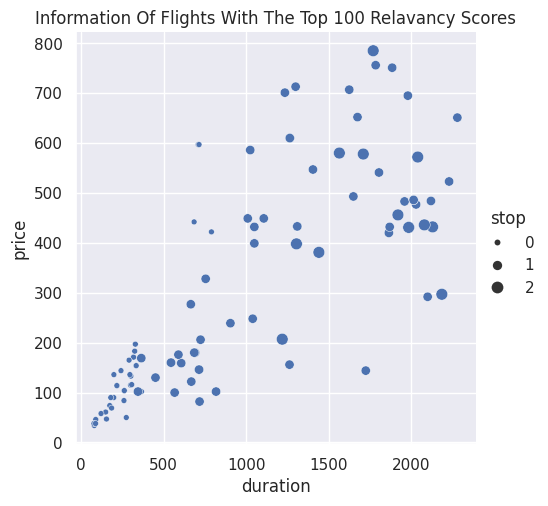

In [13]:
# TODO: for flights with the top 100 relavancy scores, plot the flight information as specified
flights_top_100 = df.head(100)

import matplotlib.pyplot as plt
sns.set_theme()

sns.relplot(
    data=flights_top_100,
    x='duration', y='price', size='stop'
)

plt.title('Information Of Flights With The Top 100 Relavancy Scores')



## Part 2: Barnes & Noble Best Selling Books

In this part, we'll inspect Barnes & Noble's website to fetch the information about the top 20 best selling books of the store. The overall process will be a lot similar to what has been demonstrated in the class.

In [14]:
from bs4 import BeautifulSoup

In [15]:
url = "https://www.barnesandnoble.com/b/books/_/N-1fZ29Z8q8"

**Step 1:** Get response from url

In [17]:
# TODO: get response from url with the requests library

try:
  kv = {"user-agent": "Chrome/119.0.6045.212"}
  response = requests.get(url, headers = kv)
  response.raise_for_status()
except HTTPError as http_err:
  print("HTTP error occurred: {}".format(http_err))
except Exception as err:
  print("Other error occurred: {}".format(err))
else:
  print("Success!")



Success!


**Step 2:** Create a BeautifulSoup object, and inspect the html source of the target website.

In [18]:
# TODO: create a beautiful soup object from the response you get
soup = BeautifulSoup(response.content, "html.parser")
# print(soup.prettify())


**Step 3:** Based on the pattern that you have found, extract all contents (tag segments) under the tag or class you've figured out based on the html source. Remember that you could always inspect the parent of the current tag by visiting `.parent`!

In [19]:
# TODO: ^
book_elements = soup.find_all("li", class_="pb-s mt-m bd-bottom-disabled-gray record list-view-data")


**Step 4:** Fetch the book information (name and price) from the scraped content.

In [20]:
# TODO: use a for loop, get the book information from the html content you've scraped
# store the information into an organized data structure
books = []

for idx, book_element in enumerate(book_elements[:20]):
  rank = idx + 1

  title_element = book_element.find("h3", class_="product-info-title")
  title = title_element.find("a").text.strip() if title_element else "N/A"

  price_element = book_element.find("span", class_="current")
  price = price_element.text.strip().strip('$') if price_element else "N/A"

  author_element = book_element.find("div", class_="product-shelf-author")
  author = author_element.find("a").text.strip() if author_element else "N/A"

  format_element = book_element.find("td", class_="format")
  format_ = format_element.find("a").text.strip() if format_element else "N/A"

  date_element = title_element.find("span", class_="text--small publ-date")
  date = date_element.text.strip().strip('()') if date_element else "N/A"

  print(rank, title, author, price, format_, date)
  element_array = [rank, title, author, price, format_, date]
  books.append(element_array)


# Create the pandas DataFrame
df = pd.DataFrame(books, columns=["Rank", "Title", "Author", "Price", "Format", "Date"])
# Check the DataFrame
print(df.head())

1 Reckless (B&N Exclusive Edition) Lauren Roberts 21.99 Hardcover 07/02/2024
2 Hooked Emily McIntire 17.99 Paperback 09/07/2021
3 Fearless (B&N Exclusive Edition) Lauren Roberts 21.99 Hardcover 04/08/2025
4 The Book of Bill (B&N Exclusive Edition) Alex Hirsch 26.99 Hardcover 07/23/2024
5 Onyx Storm (Deluxe Limited Edition) Rebecca Yarros 32.99 Hardcover 01/21/2025
6 The God of the Woods (Barnes & Noble Book Club Edition) Liz Moore 27.00 Hardcover 07/02/2024
7 Hunger Games 4-Book Paperback Boxed Set Deluxe Edition (The Hunger Games, Catching Fire, Mockingjay, The Ballad of Songbirds and Snakes) Suzanne Collins 54.36 Paperback 02/04/2025
8 Dragonfall (B&N Exclusive Edition) L. R. Lam 18.00 Paperback 06/25/2024
9 Apprentice to the Villain (B&N Exclusive Edition) Hannah Nicole Maehrer 19.99 Paperback 08/06/2024
10 One Dark Window Rachel Gillig 18.99 Paperback 09/27/2022
11 Two Twisted Crowns Rachel Gillig 17.09 Paperback 10/17/2023
12 Days at the Morisaki Bookshop: A Novel Satoshi Yagisawa